In [ ]:
import numpy as np
import tensorflow as tf
import os
from scipy import ndimage, misc
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt
import pickle
import h5py
import sklearn
from sklearn.model_selection import train_test_split
from collections import Counter
import glob
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from random import shuffle
import imp
import os
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
import random
%matplotlib inline

In [19]:
map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
        11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
        14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'}

In [20]:
def get_train_set():

    i = 0
    train_num_images = 0
    pics = []
    labels = []
    Y_dict = {}
    for k, dirnames in map_characters.items():
        print(dirnames)
        print(len(Y_dict))
        Y_dict[dirnames] = i
        for filename in os.listdir("simpsons_dataset/"+ dirnames):
            train_num_images = train_num_images + 1
            #print(filenames,"\n")
            # img = mpimg.imread("data/train_valid/"+ dirnames + "/" + filename) or  img =  misc.imread("data/train_valid/"+ dirnames + "/" + filename)
            img =  misc.imread("simpsons_dataset/"+ dirnames + "/" + filename)
    #         plt.imshow(img)
    #         plt.show()
            img = misc.imresize(img , (64,64,3) )
            if img is not None:
                pics.append(img)
                labels.append(i)
    #             print(img)
    #             print(labels)

        i = i + 1
    
    c = list(zip(pics, labels))

    random.shuffle(c)

    X,Y = zip(*c)
    
    train_set = np.reshape(X , (train_num_images,64,64,3) )
    train_out = keras.utils.to_categorical(Y,num_classes=len(Y_dict))
    
    return (train_set , train_out)

In [24]:
train_data = get_train_set()

abraham_grampa_simpson
0


/home/a95/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()
/home/a95/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


apu_nahasapeemapetilon
1
bart_simpson
2
charles_montgomery_burns
3
chief_wiggum
4
comic_book_guy
5
edna_krabappel
6
homer_simpson
7
kent_brockman
8
krusty_the_clown
9
lisa_simpson
10
marge_simpson
11
milhouse_van_houten
12
moe_szyslak
13
ned_flanders
14
nelson_muntz
15
principal_skinner
16
sideshow_bob
17


In [42]:
print(train_data[0].shape)
print(train_data[1].shape)
print(train_data[1])

(18992, 64, 64, 3)
(18992, 18)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [32]:
from sklearn.model_selection import train_test_split

X = train_data[0]
y = train_data[1]
test_size = 0.15

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [34]:
print(X_train.shape)
print(X_test.shape)

(16143, 64, 64, 3)
(2849, 64, 64, 3)


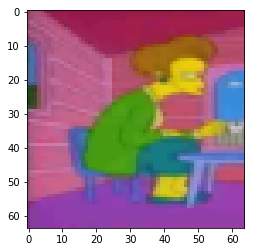

In [38]:
import matplotlib.pyplot as plt

plt.imshow(X[0])

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

def create_model_three_conv(newX):
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                     activation='relu',
                     input_shape=newX.shape[1:]))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
  
    model.add(Flatten())
    model.add(Dense(train_data[1].shape[1], activation='relu'))
    model.add(Dense(train_data[1].shape[1], activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ["accuracy"])
    
    return model

In [62]:
model1 = create_model_three_conv(X)

In [63]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 12, 12, 64)        18496     
__________

In [71]:
def create_model_four_conv(newX):
    """
    CNN Keras model with 4 convolutions.
    :param input_shape: input shape, generally X_train.shape[1:]
    :return: Keras model, RMS prop optimizer
    """
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=newX.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(train_data[1].shape[1]))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ["accuracy"])
    return model

In [72]:
model2 = create_model_four_conv(X)

In [73]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
activation_24 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_25 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 31, 31, 64)        18496     
__________

In [96]:
from keras.models import load_model

model1 = load_model('simphson_classification_model')

In [97]:
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"

keras.callbacks.ModelCheckpoint(
    filepath,
    monitor='val_loss', verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode='auto', period=1
)

In [98]:
tbCallBack =keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=True, write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)

In [99]:
model1.fit(x = X_train ,y = y_train, epochs = 5 , batch_size = 128, callbacks=[tbCallBack] )

Epoch 1/5
16143/16143 [==============================] - 100s 6ms/step - loss: 0.3250 - acc: 0.8992
Epoch 2/5
16143/16143 [==============================] - 103s 6ms/step - loss: 0.2783 - acc: 0.9119
Epoch 3/5
16143/16143 [==============================] - 99s 6ms/step - loss: 0.1876 - acc: 0.9420
Epoch 4/5
16143/16143 [==============================] - 99s 6ms/step - loss: 0.1699 - acc: 0.9456
Epoch 5/5
16143/16143 [==============================] - 98s 6ms/step - loss: 0.0954 - acc: 0.9727


In [101]:
preds1 = model1.evaluate(x = X_test , y = y_test)

print()
print ("Loss = " + str(preds1[0]))
print ("Test Accuracy = " + str(preds1[1]))

2849/2849 [==============================] - 5s 2ms/step

Loss = 0.938674358131
Test Accuracy = 0.792207792208


In [102]:
from keras.models import load_model

model1.save('simphson_classification_model')

In [118]:
tensorboard --logdir= 'logs'


SyntaxError: can't assign to operator (<ipython-input-118-fa11a78c6e9b>, line 1)

In [77]:
model2.fit(x = X_train ,y = y_train, epochs = 1 , batch_size = 64)

Epoch 1/1
16143/16143 [==============================] - 192s 12ms/step - loss: 15.2125 - acc: 0.0562


In [ ]:
preds2 = model2.evaluate(x = X_test , y = y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))